In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import sys

In [2]:
df = pd.read_csv('new_hps2.csv')
for index, row in df.iterrows():
    if row['state_metropolitan'] == 'metropolitan':
        df.at[index,'state_metropolitan'] = 1
    else:
        df.at[index,'state_metropolitan'] = 0
        
del df["teach_indivisualstudy"]
del df["Week"]
X = df.iloc[:,2:22]
y = df.iloc[:,-1] 

In [4]:
X = df[[ "Householdincome", "teach_studytime", "teach_livecontact", "anxiety", "worry", "Marital_Status", "Food_Sufficency", "no_interest","depression","Public_Health_insurance_status"]].to_numpy()
y = df[['whether_study']].to_numpy()
y = np.ravel(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
from sklearn.tree import DecisionTreeClassifier
tree_train_list = []
index = []
tree_test_list = []
for i in range(100):
    index.append(i+ 1)
    tree = DecisionTreeClassifier(max_depth=i + 1)
    tree.fit(X_train, y_train)
    tree_test_list.append(tree.score(X_test, y_test)) 
    tree_train_list.append(tree.score(X_train, y_train)) 

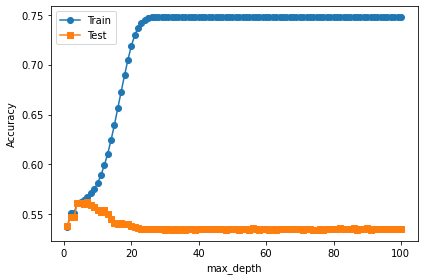

In [6]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
plt.plot(index, tree_train_list, marker='o', label='Train')
plt.plot(index, tree_test_list, marker='s', label='Test')
plt.legend(loc='best', numpoints=1)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.tight_layout()

In [12]:
from sklearn.model_selection import GridSearchCV
tree = DecisionTreeClassifier(random_state=123)

new_list = [None]
for i in range(20):
    new_list.append(i+1)
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': new_list
}

gs = GridSearchCV(estimator=tree,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=10)

gs.fit(X_train, y_train)

print('Best Accuracy: %.2f%%' % (gs.best_score_*100))
print('Best Params: %s' % gs.best_params_)
print('Test Accuracy: %.2f%%' % (gs.best_estimator_.score(X_test, y_test)*100))

Best Accuracy: 56.12%
Best Params: {'criterion': 'gini', 'max_depth': 4}
Test Accuracy: 56.15%


In [13]:
y_pred_tree = gs.best_estimator_.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
tree_conf = confusion_matrix(y_test, y_pred_tree)
print(tree_conf)
print(classification_report(y_test, y_pred_tree))


[[15009  6034]
 [11109  6939]]
              precision    recall  f1-score   support

           0       0.57      0.71      0.64     21043
           1       0.53      0.38      0.45     18048

    accuracy                           0.56     39091
   macro avg       0.55      0.55      0.54     39091
weighted avg       0.56      0.56      0.55     39091

